# Цифровая обработка сигналов - Лекция 3
# Свертка и корреляция: линейная и циклическая свертка

## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Свертка и корреляция

В реальных задачах часто ставится вопрос о степени похожести одного процесса на другого или же о независимости одного процесса от другого. Иными словами, требуется определить взаимосвязь между сигналами, то есть найти корреляцию.  

Методы корреляции используются в широком диапазоне задач: поиск сигналов, компьютерное зрение и обработка изображений, в задачах радиолокации для определения характеристик целей и определения расстояния до объекта. Кроме того, с помощью корреляции производится поиск слабых сигналов в шумах.

В разделе фильтрация сигналов вводилось понятие импульсной характеристики фильтра. Напомним, что **импульсной характеристикой** $h(n)$ называется реакция цепи на входное воздействие в виде функции Дирака (δ-функции). Она отражает влияние цепи на сигнал.

В задачах прохождения сигналов через различные цифровые узлы происходит свертка сигнала с импульсной характеристикой фильтра.

*Корреляцию* между двумя сигналами можно вычислить как сумму произведений пар отсчетов исследуемых сигналов.  

Если взять две абсолютно независимые случайные последовательности, то их сумма произведений стремится к нулю. Говорят, что такие сигналы обладают нулевой корреляцией. Причем, чем длиннее последовательности, тем сильнее результат стремится к нулевому значению.

Корреляция бывает **положительной** и **отрицательной**. Положительная корреляция - большие значения одного сигнала связаны с большими значениями другого сигнала (увеличение одной переменной взаимосвязано с увеличением другой переменной). Отрицательную корреляцию проще всего понимать так: увеличение одной переменной связано с уменьшением другой переменной. 

Формула взаимной корреляции:

$$ r_{12} = \frac{1}{N} \sum_{n=0}^{N-1}x_1(n)x_2(n) \tag{3.1}$$

Нормирующий множитель $\frac{1}{N}$ применяется для исключения влияния длительности последовательностей. 

В терминах функционального пространства сигналов корреляция может быть выражена как косинус угла между векторами. Следовательно, при полном совпадении сигналов степень их связи будет принимать положительное единичное значение, при полной противоположности сигналов - отрицательную единицу, а при полном несовпадении - нулевое значение.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft, ifft

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

Приведем примеры сигналов и найдем корреляцию между ними

Положительная корреляция:

In [2]:
# signal x1(n)
x1 = np.array([1, 2, 3, 4, 5])

# correlation
np.correlate(x1, x1, mode='valid')

array([55])

In [3]:
# signal x1(n)
x1 = np.array([1, 2, 3, 4, 5])

# correlation via sum
np.sum(x1*x1)

55

Как видно, встроенная функция `correlate()` для совпадающих сигналов вычисляет сумму произведений, что полностью согласуется с формулой.

Отрицательная корреляция:

In [4]:
# signal x2(n)
x2 = -1 * np.array([1, 2, 3, 4, 5])

# correlation
np.correlate(x1, x2, mode='valid')

array([-55])

Разные сигналы:

In [5]:
# signal x1(n), x2(n)
x1 = np.ones(5)      # [1, 1, 1, 1, 1]
x2 = np.arange(5)    # [0, 1, 2, 3, 4]

# correlation
np.correlate(x1, x2, mode='valid')

array([10.])

In [6]:
np.sum(x1*x2)   # correlation as sum of products

10.0

На практике, когда два сигнала коррелируют, их взаимное расположение во времени - неизвестно. Сигналы могут иметь одинаковую форму, но задержаны друг относительно друга. В связи с этим, для установления максимальной корреляции, её требуется находить для нескольких задержек.

### Случайные сигналы

Найдем корреляцию двух псевдослучайных процессов.

Параметр `seed()` задает начальное условие для случайного процесса. Если установить какое-либо число, то при вызове любой функции случайного числа будет генерироваться предопределенный набор чисел (псевдослучайный).

С помощью метода `randint()` из библиотеки `numpy.random` зададим случайную последовательность целых чисел.

#### Случайные процессы с нулевой корреляцией:

No correlation, r12 = [-45].


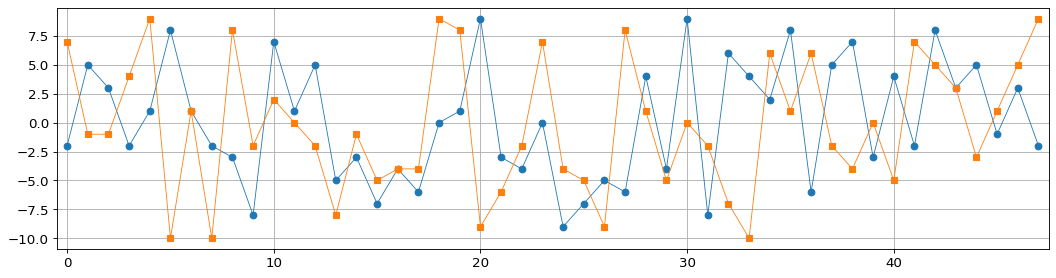

In [7]:
N = 48
# No correlation. Seed for all random process
np.random.seed(2)
x1 = np.random.randint(-10, 10, N)
x2 = np.random.randint(-10, 10, N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.75, markersize=6)
plt.plot(x2, '-s', linewidth=0.75, markersize=6)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print(f'No correlation, r12 = {r12}.')

#### Случайные процессы с ненулевой корреляцией:

Correlation, r12 = [-69].


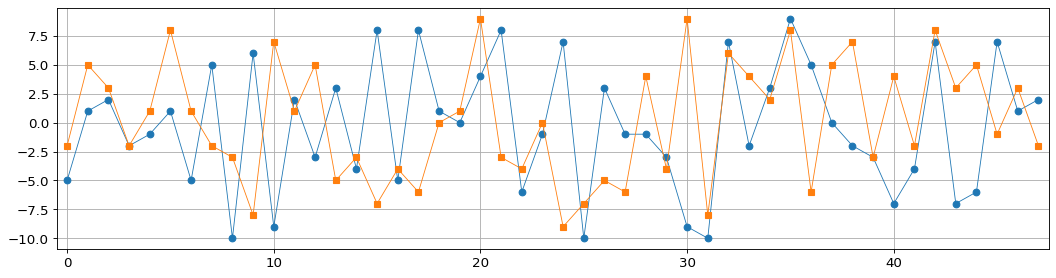

In [8]:
N = 48
# Correlation
np.random.seed(1)
x1 = np.random.randint(-10, 10, N)
np.random.seed(2)
x2 = np.random.randint(-10, 10, N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.75, markersize=6)
plt.plot(x2, '-s', linewidth=0.75, markersize=6)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print(f'Correlation, r12 = {r12}.')

Фильтрующее свойство **дельта-функции** в процессе вычисления корреляции позволяет найти значение сигнала в момент, когда дельта-функция не равна 0:

Correlation, r12 = [-8.96717793].


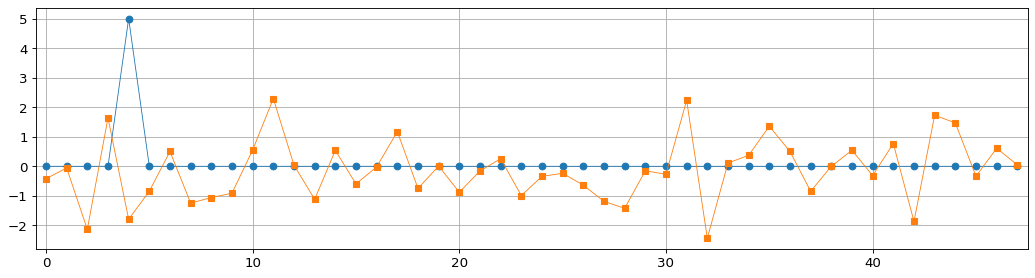

In [9]:
N = 48
# delta-function
x1 = np.zeros(N)
x1[4] = 5
# random signal
np.random.seed(2)
x2 = np.random.randn(N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.75, markersize=6)
plt.plot(x2, '-s', linewidth=0.75, markersize=6)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print(f'Correlation, r12 = {r12}.')

### Автокорреляционная функция

Автокорреляционная функция (АКФ) - показывает зависимость между сигналом и его копией, сдвинутой по времени. 

АКФ находит применение в кодировании информации. Выбор кодирующей последовательности по параметрам длины, частоты и формы во многом обусловлен корреляционными свойствами этой последовательности. Наилучшая кодовая последовательность обладает наименьшим значением вероятности ложного обнаружения или срабатывания (для детектирования сигналов, для пороговых устройств) или ложной синхронизации (для передачи и приема кодовых последовательностей).

Автокорреляционная функция помогает находить повторяющиеся участки во временной последовательности, с помощью АКФ можно находить несущую частоту сигнала.

Поскольку АКФ есть произведение сигнала и его копии, то физический смысл АКФ - энергия сигнала. В частности, в нулевой момент времени (`n = 0`) АКФ  равна энергии сигнала.

В numpy нет встроенной функции автокорреляции, но её несложно написать самому на базе функции `correlate()`.

### Свойства АКФ

1. АКФ это симметричная и четная функция.
3. Имеет максимум в нуле.
4. АКФ периодической последовательности - периодическая функция.
5. АКФ суммы двух некоррелированных сигналов - сумма АКФ этих сигналов.
6. АКФ бесконечного во времени белого шума имеет пик в нулевом значении и нули во всех остальных.

### АКФ прямоугольного импульса

Пример: Автокорреляционная функция прямоугольного импульса - треугольный сигнал. Ниже будет показано, что корреляция и свертка сигнала с самим собой даёт одинаковый результат.

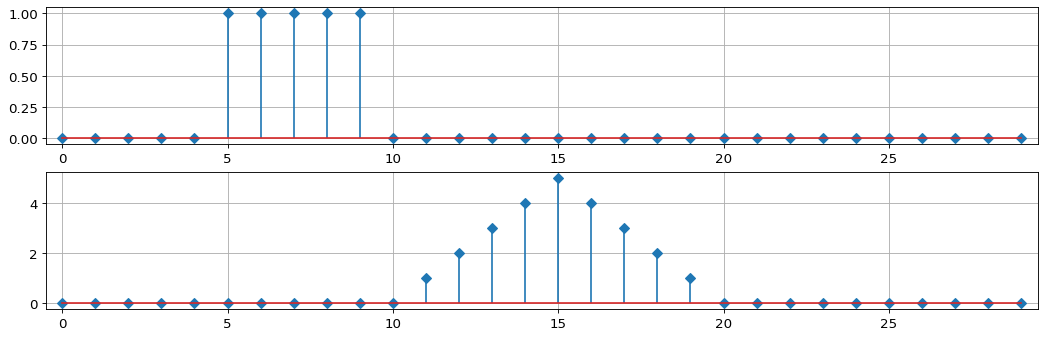

In [10]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res  # / np.max(res)

# Signal
x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(20)])

# ACF
cfx = auto_corr(x)

xl = [x, cfx]

# Pot results
plt.figure(figsize=(16, 5), dpi=80)
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.stem(xl[i], linefmt='C0', markerfmt='D', use_line_collection=True)
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

Поскольку вычисление АКФ прямым методом - трудозатратная операция (большое число операций умножения и сложения), выполняемая за $O(N^2)$, то во многих задачах встаёт вопрос о снижении качества корреляционных свойств в связи с уменьшением длины последовательности. Однако, с помощью быстрого преобразования Фурье (БПФ) можно свести вычислительную сложность к $O(Nlog(N)$. 

С помощью теоремы Винера-Хинчина, которая связывает АКФ сигнала и его спектральную плотность мощности, можно вычислить АКФ через двойное взятие БПФ сигнала.

$$ \Psi(\tau) = Re[IFFT( | FFT(x) |^2 )] \tag{3.2}$$

____

## Свертка

**Свертка** описывает взаимодействие сигналов между собой. Если один из сигналов - импульсная характеристика фильтра, то свертка входной последовательности с импульсной характеристикой есть ни что иное, как реакция цепи на входное воздействие. Иными словами, результирующий сигнал отражает прохождение сигнала через фильтр. 

Как правило, выходной сигнал является запаздывающей (относительно входа) функцией. Кроме того, выходной сигнал может быть усилен или подавлен относительно входного сигнала. 

**Чтобы найти импульсную характеристику цифрового фильтра, необходимо подать на его вход единичный импульс (дельта-функцию), который равен 1 в одной точке и равен 0 во всех остальных точках**  

### Свертка и корреляция

Связь свертки и корреляции достаточно проста: свертка эквивалентна взаимной корреляции двух последовательностей, причем одна из последовательностей обращена во времени относительно другой. В случае с корреляцией, последовательности должны быть одинаковой длины. В случае свертки последовательности могут иметь разную длину, тогда этот процесс называется линейной сверткой. В случае, если длины последовательностей совпадают - это циклическая (круговая) свертка.

### Свойства свертки

1. **Коммутативность**: 

$$ a*b = b*a \tag{3.3}$$

Из этого выражения вытекает следующее утверждение:

$$ \sum_{m=0}^{N-1}a(m)b(n-m) = \sum_{m=0}^{N-1}a(n-m)b(n) \tag{3.4}$$


2. **Дистрибутивность**: 

$$ a*(b+c) = a*b + a*c \tag{3.5}$$

3. **Ассоциативность**: 

$$ a*(b*c) = (a*b)*c = (a*c)*b \tag{3.6}$$


Существует два типа свертки - линейная и циклическая (круговая).

## Линейная свертка

Линейная свертка двух сигналов $a(n)$ , где $n = 0, ..., N-1$ и $b(n)$,  где $n = 0, ..., M-1$ описывается уравнением:  

$$ s(n) = a*b = \sum_{m=0}^{n}a(m)\cdot b(n-m) \tag{3.7}$$

где 
- $n = 0, ..., N+M-2$ ,
- $N$ - длина сигнала $a(n)$ , 
- $M$ - длина сигнала $b(n)$ ,

Вычисление свертки - итеративный процесс, в котором сигналы сдвигают друг относительно друга, затем перемножают и складывают. Предполагается, что сигналы равны нулю вне заданных своих диапазонов, то есть $a(n) = 0$ при $N < n < 0$ и $b(n) = 0$ при $M < n < 0$.

На следующем примере вычислим пошагово свертку сигналов:

`a(n) = [1, 2, 3, 4], N = 4`

`b(n) = [3, 2, 1], M = 4`

Простейший алгоритм (через циклическую свёртку):

1. Дополняем нулями слева первый сигнал до длины N+M-1.
2. Инвертируем во времени второй сигнал.
3. Дополняем нулями справа второй сигнал до длины N+M-1.
4. В цикле от 0 до N+M-2 сдвигаем второй сигнал вправо (или первый сигнал влево)
5. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

Сравним полученный результат и значения, вычисленные с помощью встроенной функции `convolve()` с параметром `mode='full'`.

In [11]:
# input parameters
N, M = 4, 3

# lists of data
a = [1, 2, 3, 4]
b = [3, 2, 1]

# signals
an = np.concatenate([np.zeros(M-1, dtype=int), a])
bn = np.concatenate([b[::-1], np.zeros(N-1, dtype=int)])
print('a(n) = ', a)
print('b(n) = ', b)

# Convolution with 'same' mode with list comprehension:
ab = np.array([np.sum(an * np.roll(bn, i)) for i in range(N+M-1)])

# simple way:
# ab = []
# for i in range(N+M-1):
#     br = np.roll(bn, i)    # shift second signal
#     sm = np.sum(an * br)   # calc sum of prods
#     ab.append(sm)          # append new value to the list

# Function convolution:
print('\na(n) * b(n) = ', ab)

# Convolution with np.convolve method:
cv = np.convolve(a,b, mode='full')
print('np.convolve = ', cv)

# Check conv method:
ab_check = np.all(ab == cv)
print(ab_check)

a(n) =  [1, 2, 3, 4]
b(n) =  [3, 2, 1]

a(n) * b(n) =  [ 3  8 14 20 11  4]
np.convolve =  [ 3  8 14 20 11  4]
True


### Пошаговое объяснение линейной свёртки

Важно помнить, что второй сигнал сначала инвертируется слева направо, согласно формуле вычисления свертки!

```
Step 1:
a = [0, 0, 1, 2, 3, 4]
b = [1, 2, 3, 0, 0, 0]

sum of prod = [3]

Step 2:
a = [0, 0, 1, 2, 3, 4]
b = [0, 1, 2, 3, 0, 0]

sum of prod = 1*2 + 2*3 = [8]

Step 3:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Step 5:
a = [0, 0, 1, 2, 3, 4]
b = [3, 0, 0, 0, 1, 2]

sum of prod = 1*3 + 2*4 = [11]

Step 6:
a = [0, 0, 1, 2, 3, 4]
b = [2, 3, 0, 0, 0, 1]

sum of prod = 1*4 = [4]

Convolution seq = [3, 8, 14, 20, 11, 4]
``` 

### Свёртка прямоугольного импульса

Свёртка прямоугольного импульса с самим собой вырождается в сигнал треугольной формы. Как было показано выше, для автокорреляционной функции результат аналогичен:

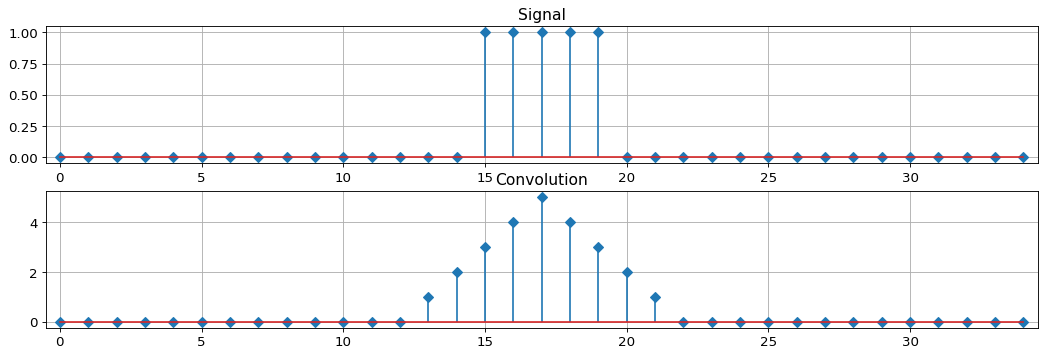

In [12]:
# Signal
x = np.concatenate([np.zeros(15), np.ones(5), np.zeros(15)])

# Convolution
cv = np.convolve(x, x, mode='same')
xl = [x, cv]

# Pot results
plt.figure(figsize=(16, 5), dpi=80)
titles = ["Signal", "Convolution"]
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.title(titles[i])
    plt.stem(xl[i], linefmt='C0', markerfmt='D', use_line_collection=True)
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

## Циклическая свёртка

Циклическая (круговая) свертка отличается от линейной тем, что входные сигналы имеют одинаковую длительность $N$.

Циклическая свертка двух сигналов $a(n)$ и $b(n)$, где $n = 0, ..., N-1$ ,  описывается уравнением:  

$$ s(n) = a*b = \sum_{m=0}^{N-1}a(m)\cdot b(n-m) \tag{3.8}$$

где $n = 0, ..., N-1$ , а число $N$ - длина сигнала $a(n)$ . Как видно, результат циклической свёртки имеет длину N.


На следующем примере вычислим пошагово свертку сигналов:

`a(n) = [1, 2, 3, 4]`

`b(n) = [3, 2, 1, 0]`

Алгоритм:

1. Инвертируем второй сигнал,
2. В цикле от 0 до N-1 сдвигаем второй сигнал вправо (или первый сигнал влево)
3. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

Полученный результат не совпадает со встроенным методом `convolve()` с параметром `mode='same'` в связи с тем, что для этого метода в библиотеке numpy используется дополнение нулями.

In [13]:
# Input parameters
N = 4

# Signals
an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)
print('a(n) = ', an)
print('b(n) = ', bn)

# Convolution with list comprehension:
ab = np.array([np.sum(an * np.roll(bn[::-1], i+1)) for i in range(N)])

# simple way:
# ab = []
# for i in range(N):
#     br = np.roll(bn, i+1)  # shift second signal
#     sm = np.sum(an * br)   # calc sum of prods
#     ab.append(sm)          # append new value to the list

# Function convolution:
print('a(n) * b(n) = ', ab)

a(n) =  [1 2 3 4]
b(n) =  [3 2 1 0]
a(n) * b(n) =  [14 12 14 20]


### Пошаговое объяснение циклической свёртки

Первым шагом инвертируем сигнал b(n) и начинаем с -1 отсчета

```
Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 
____


В связи с тем, что в библиотеке numpy отсутствует встроенная функция для вычисления циклической свёртки, можно использовать свойство преобразования Фурье.

### Свертка через БПФ

Из предыдущих курсов, посвященных преобразованию Фурье, известно правило: 

**Свертка двух сигналов во временной области равна произведению их спектров в частотной области** 

$$ a(n) * b(n) = A(k) \cdot B(k) \tag{3.9}$$  

Используя это правило, можно вычислить циклическую свертку двух сигналов. 

In [14]:
# Convolution with IFFT of FFT(a) * FFT(b)
def circle_conv(an, bn):
    """
    Calculate circular convolution via FFTs. 
    Signals an & bn must have same shape.
    You should import fft and ifft from scipy.fftpack.
    
    Parameters
    ----------
    an : np.array
        real 1D numpy array
    bn : np.array
        real 1D numpy array
    """
    return np.real(ifft(fft(an) * fft(bn)))


# Input parameters
N = 4

# Signals
an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)

# Calculate circular convolution
cv = circle_conv(an, bn)

print('circular convolution = ', cv)

# Check conv method
ab_check = np.all(ab == cv)
print(ab_check)

circular convolution =  [14. 12. 14. 20.]
True


Вычисление свёртки через БПФ имеет ряд преимуществ, одно из которых связано с количеством выполняемых операций при вычислении.

Например, сигнал $a(n)$ имеет длину $N = 2000$, а сигнал $b(n)$ имеет длину $M = 8000$. Вычисление линейной свёртки потребует $N*M = 16.000.000$ операций умножения и сложения.

Однако, если дополнить обе последовательности до $N_{FFT} = 8192$, то для вычисления БПФ потребуется $N\cdot log_{2}(N) \approx 106.000$ операций комплексного умножения (или в 4 раза больше операций вещественного умножения). 

Из формулы для вычисления свёртки через БПФ очевидно, что требуется три звена БПФ: два прямых БПФ для входных сигналов и одно обратное БПФ для произведения спектров сигналов. Комплексные умножения спектров вносят несущественный вклад (8192 комплексных умножения), поэтому результирующее оценочное значение количества операций $3 \cdot 4 \cdot N\cdot log_{2}(N) \approx 1.280.000$

Полученное значение в **12.5** раз меньше, чем если бы пришлось вычислять линейную свёртку по формуле из определения.

### Сравнение эффективности

Ниже представлена таблица сравнения эффективности быстрой свертки и свертки, вычисляемой по прямой формуле. В таблице сравнивается число действительных умножений, требуемых для вычисления свертки.

Как видно, для длин БПФ до 64, быстрая свёртка проигрывает у прямого метода. Однако, при увеличении длины БПФ результаты меняются в обратную сторону - быстрая свертка начинает выигрывать у прямого метода. Причем, чем больше длина БПФ, тем лучше выигрыш.

| **N** | **Прямой метод** | **Быстрая свертка** | **Отношение** |
| --- | --- | --- | --- | 
| 8   | 64  | 448    | 0.14 |
| 16  | 256 | 1088   | 0.24 |
| 32  | 1K  | 2560   | 0.4  |
| 64  | 4K  | 5888   | 0.7  |
| 128 | 16K | 13312  | 1.23 |
| ... | ... | ...    | ...  |
| 2K  | 4M  | 311296 | 13.5 |

____

### Список функций из пакета signal:

Ниже приведен список основных функций из пакета **scipy** по тематике свертки и корреляции.

**Свертка и корреляция**


| **Function** | **Description** |
| --- | --- | 
| `convolve(in1, in2[, mode, method])`                 | Свертка двух N-мерных массивов                     |
| `correlate(in1, in2[, mode, method])`                | Кросс-корреляция двух N-мерных массивов            |
| `fftconvolve(in1, in2[, mode, axes])`                | Свертка двух N-мерных массивов через БПФ           |
| `convolve2d(in1, in2[, mode, boundary, fillvalue])`  | Свертка двух 2-мерных массивов                     |
| `correlate2d(in1, in2[, mode, boundary, ...])`       | Корреляция двух 2-мерных массивов                  |
| `sepfir2d(input, hrow, hcol)`                        | Свертка массива рангом 2 с характеристикой фильтра ранга 1. Функция может использоваться для поиска изображения по его B-сплайновому представлению.              |
| `choose_conv_method(in1, in2[, mode, measure])`      | Поиск наибыстрейшего метода корреляции или свертки |


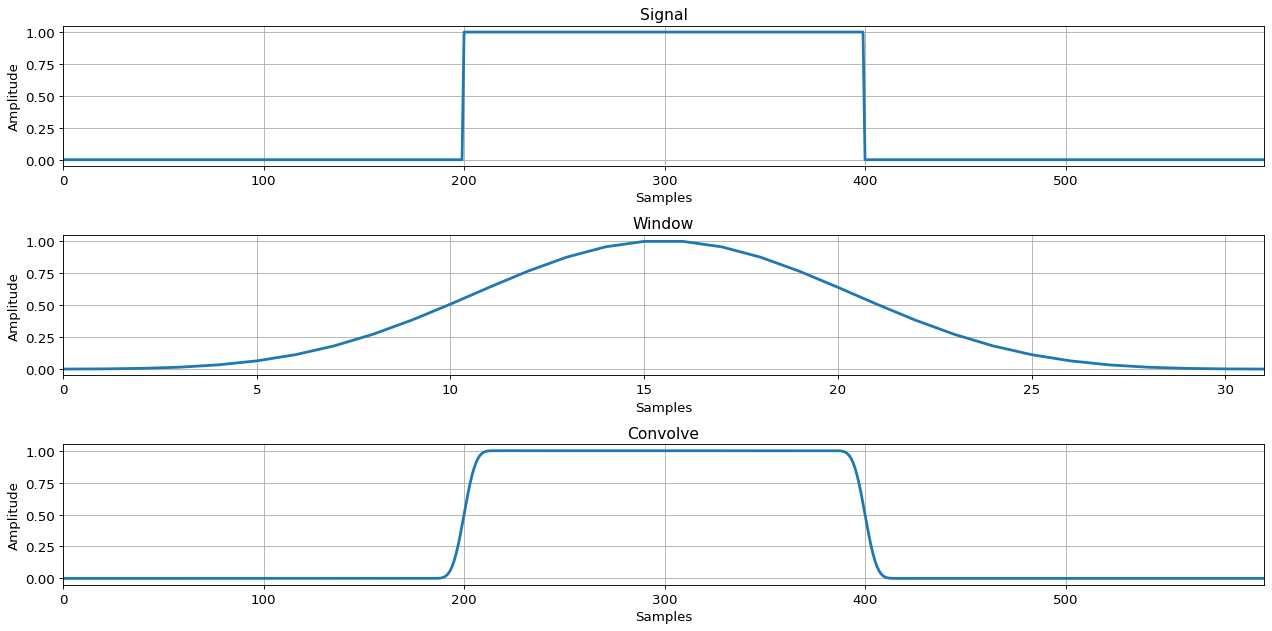

In [15]:
from scipy import signal

# Signal
sig = np.repeat([0., 1., 0.], 200)
# Window
win = signal.kaiser(32, beta=11)
# Filter by using convolve
fil = signal.convolve(sig, win, mode='same') / np.sum(win)

# list of frequencies
f_list = [sig, win, fil]
t_list = ['Signal', 'Window', 'Convolve']
# Plot
plt.figure(figsize=(16, 8), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.5)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, f_list[i].size-1])
    plt.grid()
plt.tight_layout()